# Import Libraries

In [1]:
%matplotlib inline
import sep
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
rcParams['figure.figsize'] = [10., 8.]

# Read a FITS file and display it

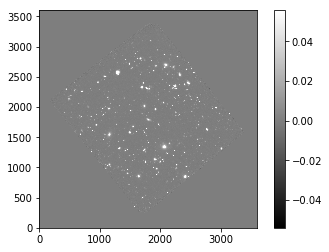

In [2]:
# Read the image and store in array.
img = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
data = img[0].data

# Show the image.
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

# Save the image as PNG.
plt.savefig('2nd-notebook-img-1.png')

# Perform background subtraction

In [3]:
#
# NOTE: This will result in a ValueError every other compile.
#       If this notebook section fails then just run it again.
#

# Measure a spatially varying background on the image and
# get a 'global' mean and noise of the image background.

data = data.byteswap().newbyteorder()
bkg = sep.Background(data)
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


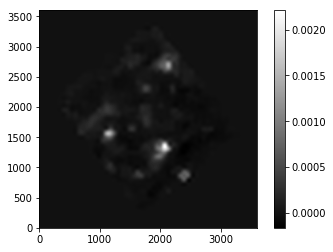

In [4]:
# Evaluate background as 2d array.
bkg_image = np.array(bkg)

# Show the background.
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

# Save the image as PNG.
plt.savefig('2nd-notebook-img-2.png')

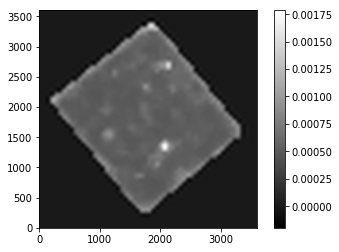

In [5]:
# Evaluate the background noise as 2d array.
bkg_rms = bkg.rms()

# Show the background noise.
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

# Save the image as PNG.
plt.savefig('2nd-notebook-img-3.png')

In [6]:
# Subtract the background.
data_sub = data - bkg

# Object detection

In [8]:
# Set the detection threshold to be constant value of 1.5 * global background RMS.
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# How many objects were detected.
len(objects)

8640

# Numer of objects detected: 8640

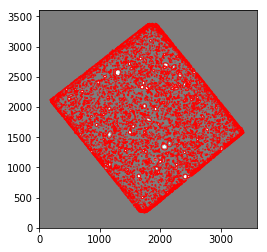

In [9]:
#
# NOTE: This takes some time for the image to appear but it does work.
#

# Plot background-subtracted image.
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Plot an ellipse for each object.
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
               width=6 * objects['a'][i],
               height=6 * objects['b'][i],
               angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
# Save the image as PNG.
plt.savefig('2nd-notebook-img-4.png')

In [10]:
# Available fields.
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# Aperture photometry

In [11]:
# Perform circular aperature photometry with a 3 pixel radius at the locations of the objects.
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

In [12]:
# Show the first 10 objects results.
for i in range(10):
    print('object {:d}: flux = {:f} +/- {:f}'.format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


# Histogram

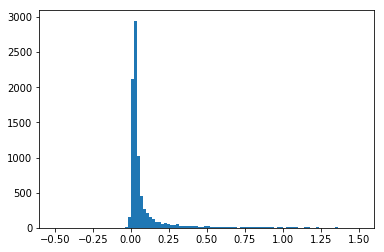

In [13]:
histogram = plt.hist(flux, bins=100, range=(-0.5,1.5))

# Extra Credit: Aline Kieu (alkieu)

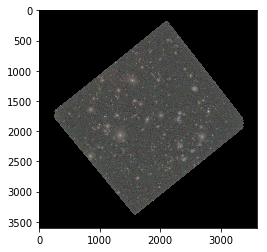

In [14]:
import matplotlib.colors as colors

f105w = fits.getdata("f105w.fits")
f105w = f105w.byteswap(inplace=True).newbyteorder()
f105w = f105w/np.max(f105w)

f125w = fits.getdata("f125w.fits")
f125w = f125w.byteswap(inplace=True).newbyteorder()
f125w = f125w/np.max(f125w)

f160w = fits.getdata("f160w.fits")
f160w = f160w.byteswap(inplace=True).newbyteorder()
f160w = f160w/np.max(f160w)


im = (np.abs(np.stack((f160w, f125w, f105w)).transpose()))**(0.1)
plt.imshow(f105w, vmin = np.abs(np.mean(f105w)-np.std(f105w)), vmax=np.abs(np.mean(f105w)+np.std(f105w)))


plt.imshow(im, vmin=np.mean(im)-np.std(im), vmax=np.mean(im)+np.std(im), interpolation = "nearest")
plt.show()